In [1]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data

In [2]:
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

In [3]:
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/features/250' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Label mapping

In [4]:
#Sobstitute N, S, V with 0, 1, 2
label_mapping = {'N': 0, 'S': 1, 'V': 2}
for data in all_data_list:
    data['annotation'] = data['annotation'].replace(label_mapping)

# Drop positions columns    

In [5]:
for data in all_data_list:
    data.drop(['peak_pos', 'onset', 'diastolic_notch'], axis=1)

# Divide train/test

In [6]:
# Split Data
#A list of all csv is gived: because each element of a list represent a patient,
# a patient will stay only or in train or in test
train_list, test_list = train_test_split(all_data_list, test_size=0.2, random_state=42)
#train_list, val_list = train_test_split(train_list, test_size=0.2, random_state=42)

In [7]:
#Create a dataframe only for train and one for all test data
train_data = pd.DataFrame()
i = 0
for train in train_list:
    train_data = pd.concat([train_data, train], ignore_index=True)
    i = i + 1

In [8]:
# Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']

In [9]:
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(y_train, columns=['annotation'])

one_hot_encoded_array_train = one_hot_encoded_df.values

print(one_hot_encoded_df)
print(one_hot_encoded_array_train)

           0      1      2
0       True  False  False
1       True  False  False
2       True  False  False
3       True  False  False
4       True  False  False
...      ...    ...    ...
137339  True  False  False
137340  True  False  False
137341  True  False  False
137342  True  False  False
137343  True  False  False

[137344 rows x 3 columns]
[[ True False False]
 [ True False False]
 [ True False False]
 ...
 [ True False False]
 [ True False False]
 [ True False False]]


In [10]:
#Create a dataframe only for train and one for all test data
'''
val_data = pd.DataFrame()

for val in val_list:
    val_data = pd.concat([val_data, val], ignore_index=True) '''

'\nval_data = pd.DataFrame()\n\nfor val in val_list:\n    val_data = pd.concat([val_data, val], ignore_index=True) '

In [11]:
'''X_val = val_data.drop('annotation', axis=1)
y_val = val_data['annotation'] '''

"X_val = val_data.drop('annotation', axis=1)\ny_val = val_data['annotation'] "

In [12]:
'''one_hot_encoded_df_val = pd.get_dummies(y_val, columns=['annotation'])

one_hot_encoded_array_val = one_hot_encoded_df_val.values '''

"one_hot_encoded_df_val = pd.get_dummies(y_val, columns=['annotation'])\n\none_hot_encoded_array_val = one_hot_encoded_df_val.values "

In [13]:
test_data = pd.DataFrame()

for test in test_list:
    test_data = pd.concat([test_data, test], ignore_index=True)

In [14]:
X_test = test_data.drop('annotation', axis=1)
y_test= test_data['annotation']

In [15]:
one_hot_encoded_df_test = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test = one_hot_encoded_df_test.values

In [16]:
N_train = (y_train == 0).sum() 
S_train = (y_train == 1).sum() 
V_train = (y_train == 2).sum() 
'''
N_val = (y_val == 0).sum() 
S_val = (y_val == 1).sum() 
V_val = (y_val == 2).sum() 

'''
N_test = (y_test == 0).sum() 
S_test = (y_test == 1).sum() 
V_test = (y_test == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")
'''
N_perc = N_val/(N_val+S_val+V_val)
S_perc = S_val/(N_val+S_val+V_val)
V_perc = V_val/(N_val+S_val+V_val)
'''
print(f"Perc di S in val: {N_perc}")
print(f"Perc di S in val: {S_perc}")
print(f"Perc di S in val: {V_perc}")

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di S in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di S in test: {V_perc}")


Perc di N in train: 0.9240884203168686
Perc di S in train: 0.04832391658900279
Perc di V in train: 0.027587663094128613
Perc di S in val: 0.9240884203168686
Perc di S in val: 0.04832391658900279
Perc di S in val: 0.027587663094128613
Perc di S in test: 0.9049530732924645
Perc di S in test: 0.03013616882764607
Perc di S in test: 0.06491075787988933


# Model

In [17]:
def compute_class_freqs(labels):

    N = labels.shape[0]

    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [18]:
freq_pos, freq_neg = compute_class_freqs(one_hot_encoded_array_train)

print(f"pos freqs: {freq_pos}")

print(f"neg freqs: {freq_neg}")

pos freqs: [0.92408842 0.04832392 0.02758766]
neg freqs: [0.07591158 0.95167608 0.97241234]


In [19]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights
neg_contribution = freq_neg * neg_weights

In [20]:
#Custom loss function
#output loss function is the sum
#epsilon to not have log0

def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        # initialize loss to zero
        loss = 0.0

        for i in range(len(pos_weights)):
            
            loss += tf.keras.backend.mean(-(pos_weights[i] *y_true[:,i] * tf.keras.backend.log(y_pred[:,i] + epsilon)
                             + neg_weights[i]* (1 - y_true[:,i]) * tf.keras.backend.log( 1 - y_pred[:,i] + epsilon)))
        return loss
    return weighted_loss

In [21]:
#@title Calculating Weights
from sklearn.utils.class_weight import compute_class_weight

def calculating_class_weights(y_true):
    num_classes = y_true.shape[1]
    weights = np.empty([num_classes, 2])
    for i in range(num_classes):
        weights[i] = compute_class_weight(class_weight='balanced', classes=[0.,1.], y=y_true[:, i])
    return weights

class_weights = calculating_class_weights(one_hot_encoded_array_train)

keys = np.arange(0,9,1)
weight_dictionary_fold = dict(zip(keys, class_weights.T[1]))
weight_dictionary_fold

{0: 0.5410737641626877, 1: 10.346843453367486, 2: 18.124043283188175}

In [22]:
from keras.layers import BatchNormalization
model = Sequential()

# Input layer
model.add(Dense(18, activation="relu", input_shape=(len(all_data_list[0].columns) - 1,)))

model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(5, activation="relu"))
#model.add(Dense(8, activation="relu"))

# Output layer

model.add(Dense(3, activation='softmax'))

C:\Users\cricr\PycharmProjects\Ai-proj\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
def model_evaluation(y_predi, model_name_pred):

    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    cm = confusion_matrix(test_classes, predicted_class)
    classes_name = ['N', 'S', 'V']
    '''
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.show()
    '''
    
    #Normalized cm
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.title(model_name_pred)
    plt.show()

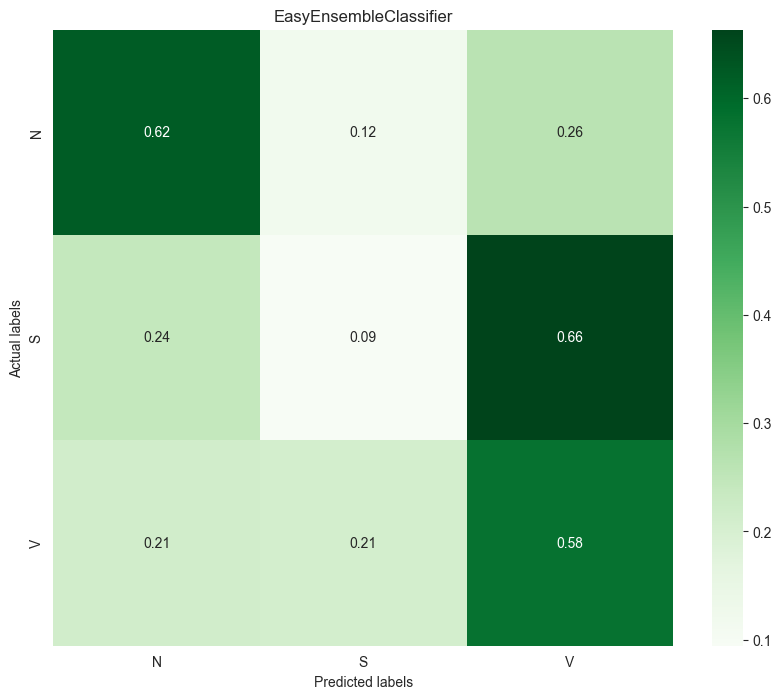

In [24]:

from imblearn.ensemble import EasyEnsembleClassifier

modelEasyEns = EasyEnsembleClassifier(n_estimators=100, n_jobs=-1, random_state=42)
modelEasyEns.fit(X_train, 
              y_train)

y_predEasyEns = modelEasyEns.predict(X_test)
one_hot_encoded_pred_ens = pd.get_dummies(y_predEasyEns, columns=['0'])

model_evaluation(one_hot_encoded_pred_ens, "EasyEnsembleClassifier")

In [25]:
'''from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
# Models
models = {
   #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Random Forest 2': RandomForestClassifier(n_estimators=100, 
                                              criterion='gini', 
                                              max_depth=15 ,
                                              min_samples_split=22, 
                                              class_weight=[{0: 0.5779660434423975, 1: 6.675863437872171, 2: 8.333250743310208}] ),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=100, class_weight={0: 0.5779660434423975, 1: 6.675863437872171, 2: 8.333250743310208}),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train and evaluate each model

for model_name, model in models.items():
    model.fit(X_train, 
              one_hot_encoded_array_train)
    y_pred = model.predict(X_test)
    model_evaluation(y_pred, model_name)
    '''

"from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, classification_report\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom xgboost import XGBClassifier\nfrom lightgbm import LGBMClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom imblearn.ensemble import BalancedRandomForestClassifier\n# Models\nmodels = {\n   #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),\n    'Random Forest 2': RandomForestClassifier(n_estimators=100, \n                                              criterion='gini', \n                                              max_depth=15 ,\n                                              min_samples_split=22, \n                                              class_weight=[{0: 0.5779660434423975, 1: 6.675863437872171, 2: 8.333250743310208}] ),\n    'Balanced Ra

In [26]:
from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(n_estimators=100, 
                                              criterion='gini', 
                                              class_weight='balanced' )
randomForestModel.fit(X_train, 
              y_train)

y_predRanFor = randomForestModel.predict(X_test)

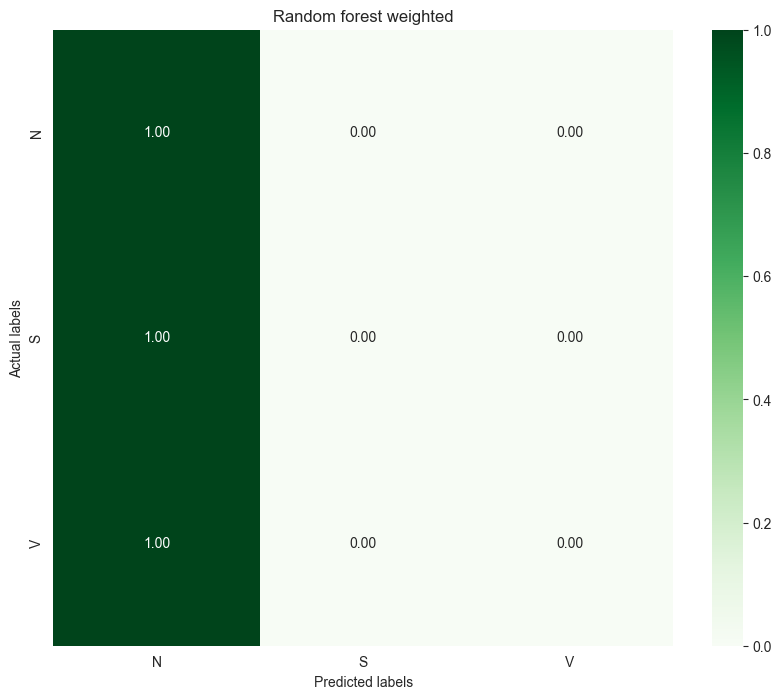

In [27]:
one_hot_encoded_pred = pd.get_dummies(y_predRanFor, columns=['0'])

model_evaluation(one_hot_encoded_pred, "Random forest weighted")

In [28]:
'''from sklearn.model_selection import GridSearchCV

parameter_grid = { 
    'n_estimators': [50, 100],
    'max_features': [None, 'sqrt', 'log2', 3],
    'max_depth' : [10, 15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : [22, 42]
}
my_model = RandomForestClassifier()
clf = GridSearchCV(my_model, parameter_grid, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 1)
clf.fit(X_train, y_train)
from sklearn import metrics
print(clf.best_params_)
print(clf.best_score_)
'''

"from sklearn.model_selection import GridSearchCV\n\nparameter_grid = { \n    'n_estimators': [50, 100],\n    'max_features': [None, 'sqrt', 'log2', 3],\n    'max_depth' : [10, 15],\n    'criterion' :['gini', 'entropy'],\n    'min_samples_split' : [22, 42]\n}\nmy_model = RandomForestClassifier()\nclf = GridSearchCV(my_model, parameter_grid, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 1)\nclf.fit(X_train, y_train)\nfrom sklearn import metrics\nprint(clf.best_params_)\nprint(clf.best_score_)\n"

In [29]:
nN = np.count_nonzero(y_train == 0)
nV = np.count_nonzero(y_train == 1)
nS = np.count_nonzero(y_train == 2)

class_sum = nN+nV+nS
wN = round(1-(nN/class_sum),2)
wV = round(1-(nV/class_sum),2)  
wS = round(1-(nS/class_sum),2)

class_weights = {0: wN+0.42, 1: wV+0.03, 2: wS+0.02}

print(class_weights)

{0: 0.5, 1: 0.98, 2: 0.99}


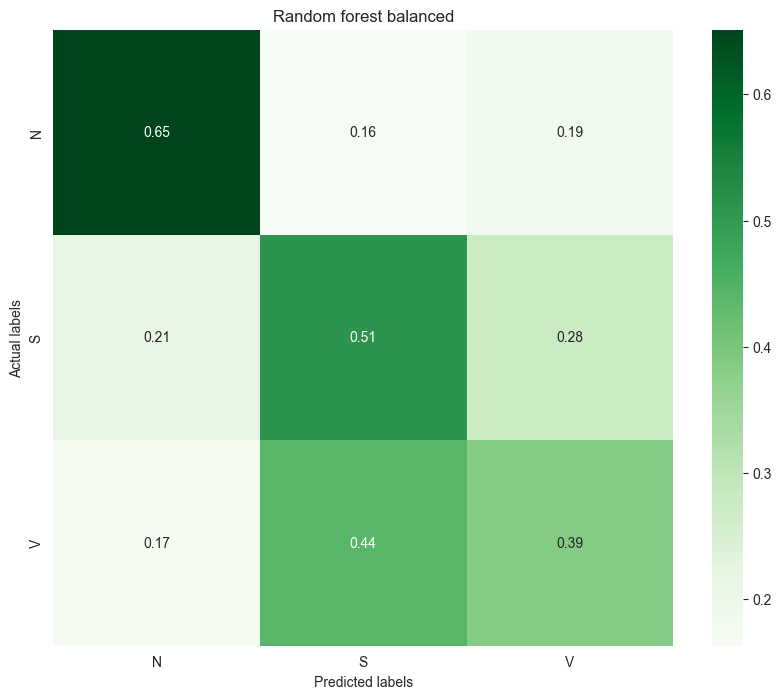

In [30]:
from imblearn.ensemble import BalancedRandomForestClassifier
randomForestModel = BalancedRandomForestClassifier(n_estimators= 100,
                                                   criterion= 'gini',
                                                   max_depth= 20,
                                                   min_samples_split= 30,
                                                   min_samples_leaf = 1,
                                                   min_weight_fraction_leaf = 0.0,
                                                   max_features= None,
                                                   sampling_strategy='not minority',
                                                   replacement= False,
                                                   n_jobs= -1,
                                                   random_state=42,
                                                   class_weight= class_weights,
                                                   bootstrap=True
                                                   )
randomForestModel.fit(X_train, 
              y_train)
y_pred = randomForestModel.predict(X_test)
one_hot_encoded_pred = pd.get_dummies(y_pred, columns=['0'])

model_evaluation(one_hot_encoded_pred, "Random forest balanced")

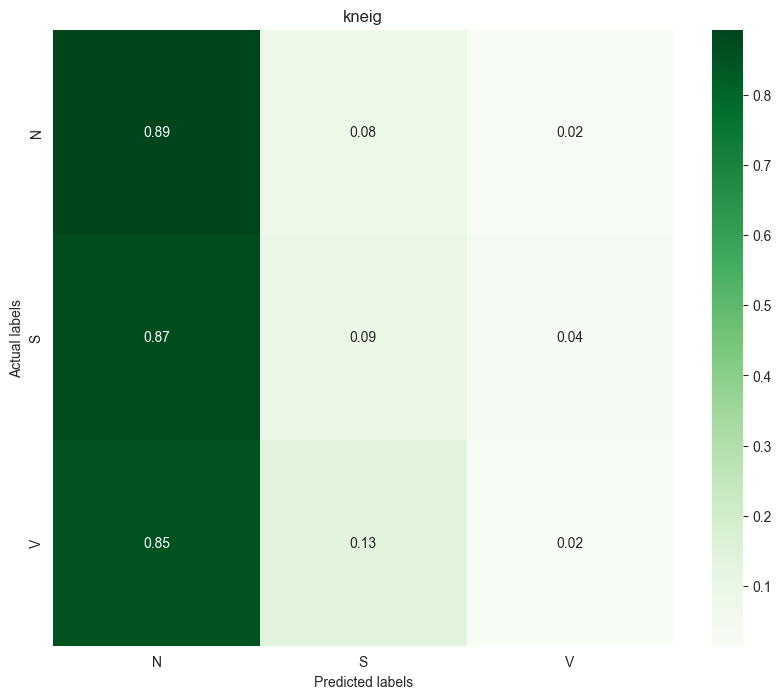

In [65]:
from sklearn.neighbors import KNeighborsClassifier
kneig  = KNeighborsClassifier(n_neighbors=10)

kneig.fit(X_train, 
              y_train)
y_pred = kneig.predict(X_test)
one_hot_encoded_pred = pd.get_dummies(y_pred, columns=['0'])

model_evaluation(one_hot_encoded_pred, "kneig")

C:\Users\cricr\PycharmProjects\Ai-proj\.venv\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\cricr\PycharmProjects\Ai-proj\.venv\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


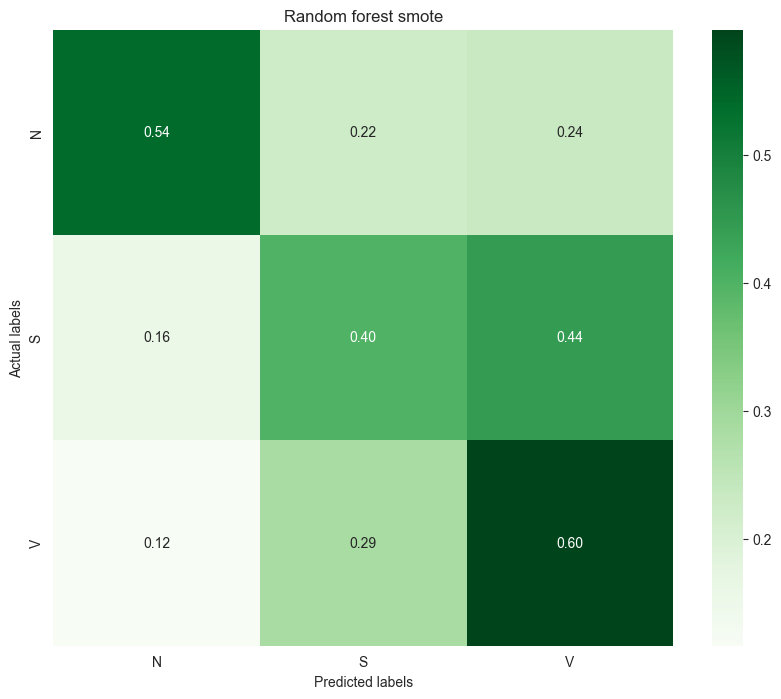

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Calculate class ratios for oversampling and undersampling
class_ratios = {
    0: len(y_train[y_train == 0]),
    1: int(len(y_train[y_train == 1]) * 1.2),
    2: int(len(y_train[y_train == 2]) * 1.3)
}

under_ratios = {
    0: int(len(y_train[y_train == 0]) *0.4),
    1: len(y_train[y_train == 1]),
    2: len(y_train[y_train == 2])
}

# Create the SMOTE and RandomUnderSampler pipeline
resampling_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=class_ratios, random_state=42)),
    ('under_sampler', RandomUnderSampler(sampling_strategy=under_ratios, random_state=42))
])

# Apply resampling to X_train and y_train
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)


'''
# Define the RandomForestClassifier
randomForestModel = BalancedRandomForestClassifier(n_estimators= 50,
                                                   criterion= 'entropy',
                                                   max_depth= 10,
                                                   min_samples_split= 30,
                                                   min_samples_leaf = 1,
                                                   min_weight_fraction_leaf = 0.0,
                                                   max_features= None,
                                                   sampling_strategy='all',
                                                   replacement= False,
                                                   n_jobs= -1,
                                                   random_state=42,
                                                   class_weight='balanced',
                                                   bootstrap=True)
                                                   
                                                   '''

randomForestModel = BalancedRandomForestClassifier(n_estimators= 100,
                                                   criterion= 'gini',
                                                   max_depth= 10,
                                                   min_samples_split= 30,
                                                   min_samples_leaf = 1,
                                                   min_weight_fraction_leaf = 0.0,
                                                   max_features= None,
                                                   n_jobs= -1,
                                                   random_state=42,
                                                   class_weight=class_weights,
                                                   bootstrap=True)

# Fit the model on the resampled data
randomForestModel.fit(X_train_resampled, y_train_resampled)

# Make predictions on X_test
y_pred = randomForestModel.predict(X_test)

# Evaluate the model
one_hot_encoded_pred = pd.get_dummies(y_pred, columns=['0'])

model_evaluation(one_hot_encoded_pred, "Random forest smote")


In [32]:
model.compile(optimizer= tf.keras.optimizers.Adam(), 
              loss=get_weighted_loss(pos_weights, neg_weights), 
              metrics=['Accuracy', 'Precision', 'Recall' ])

In [33]:
#model.compile(optimizer= tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall' ])

In [34]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=20,          # Number of epochs with no improvement after which training will stop
    verbose=1,           # Verbosity mode (1 for printing messages)
    restore_best_weights=True  # Restore the best model weights when training stops
)

In [35]:
modelHistory = model.fit(X_train, 
                         one_hot_encoded_array_train, 
                         epochs=60, 
                         batch_size=16, 
                         validation_data=(X_val, one_hot_encoded_array_val),
                         class_weight = weight_dictionary_fold,
                         callbacks=[early_stopping] 
                         ).history

Epoch 1/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - Accuracy: 0.6185 - Precision: 0.7473 - Recall: 0.1443 - loss: 0.5621 - val_Accuracy: 0.7398 - val_Precision: 0.7980 - val_Recall: 0.5505 - val_loss: 0.3157
Epoch 2/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.7009 - Precision: 0.8281 - Recall: 0.5515 - loss: 0.4940 - val_Accuracy: 0.6384 - val_Precision: 0.7985 - val_Recall: 0.5273 - val_loss: 0.2990
Epoch 3/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.7166 - Precision: 0.8348 - Recall: 0.5898 - loss: 0.4677 - val_Accuracy: 0.6034 - val_Precision: 0.7482 - val_Recall: 0.4615 - val_loss: 0.3142
Epoch 4/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.7075 - Precision: 0.8171 - Recall: 0.5890 - loss: 0.4596 - val_Accuracy: 0.7328 - val_Precision: 0.7772 - val_Recall: 0.6890 - val_loss: 0.3136
Epoch 5/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.7297 - Precision: 0.8232 - Recall: 0.6320 - loss: 0.4294 - val_Accuracy: 0.7639

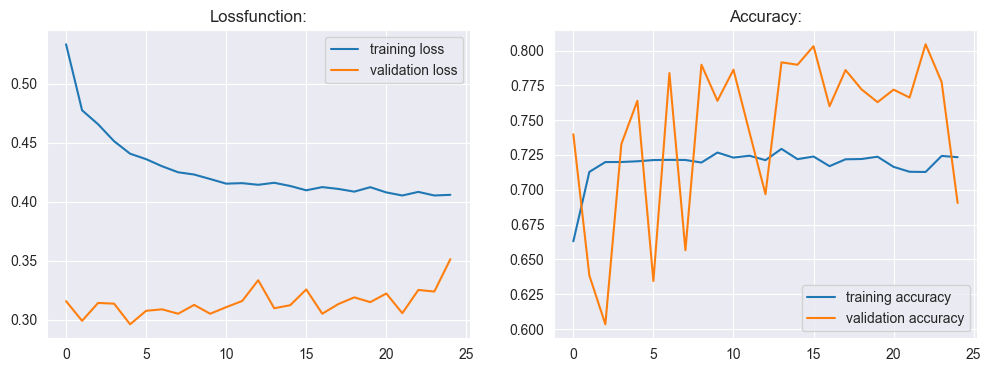

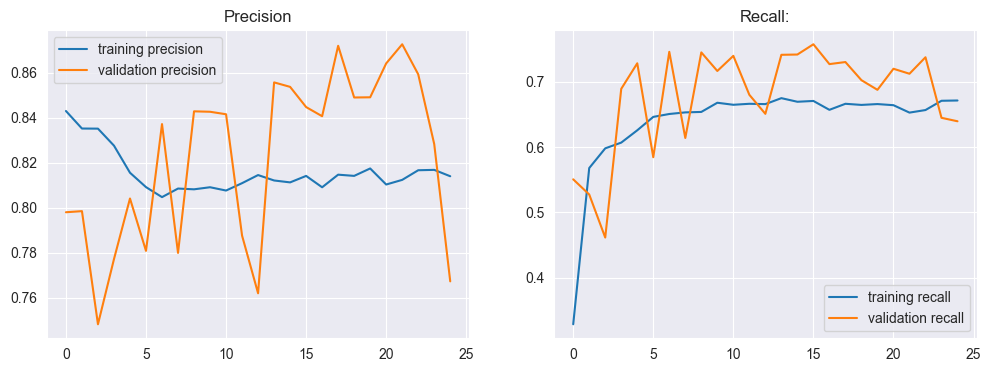

In [36]:
#plot performances
history = modelHistory
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['loss'], label="training loss")
plt.plot(history['val_loss'], label="validation loss")
plt.title('Lossfunction:')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['Accuracy'], label="training accuracy")
plt.plot(history['val_Accuracy'], label="validation accuracy")
plt.title('Accuracy:')
plt.legend()

#plot performances
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['Precision'], label="training precision")
plt.plot(history['val_Precision'], label="validation precision")
plt.title('Precision')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['Recall'], label="training recall")
plt.plot(history['val_Recall'], label="validation recall")
plt.title('Recall:')
plt.legend()

# Evaluation

In [37]:
y_pred = model.predict(X_test)

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [38]:
predicted_class = np.argmax(y_pred, axis=-1)

In [39]:
test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)

In [40]:
cm = confusion_matrix(test_classes,predicted_class)

In [41]:
classes_name = ['N', 'S', 'V']

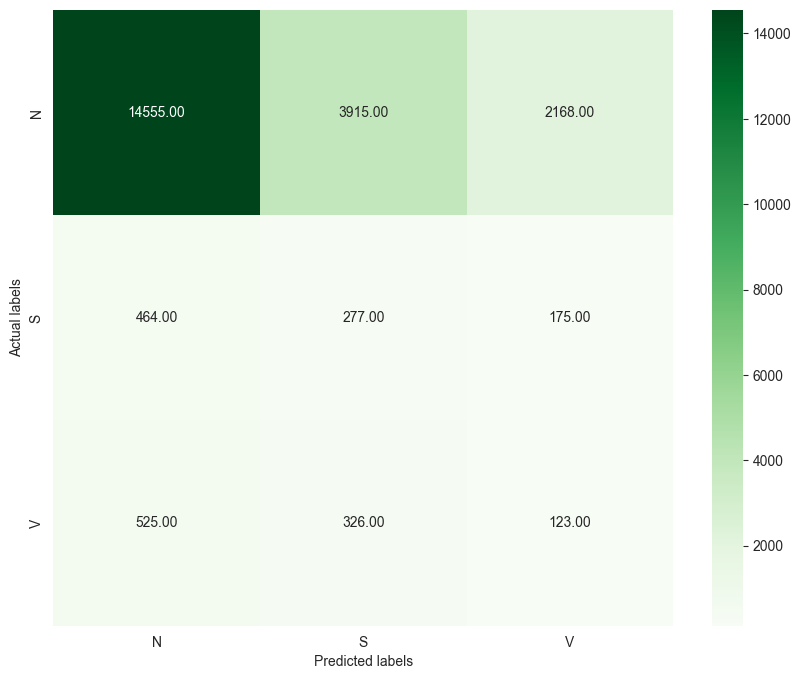

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

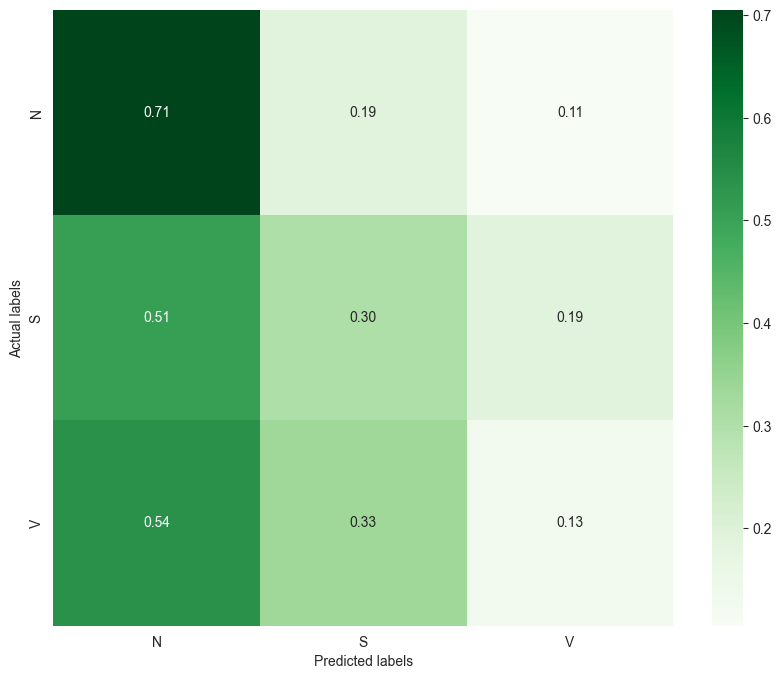

In [43]:
#Normalized cm

cm.sum(axis=1)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()